# ***TP1 : Introduction to Probabilistic Graphical Models***

## Author : Cyril Equilbec


# Question 0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


We need to compute $ s = log \sum e^{v_i}$ where each component $v_i$ is negative and $|v_i|$ is very large. This means we sum numbers that are very close to 0 and then we take the $log$ of this number, this can lead to numerical instability. 

To overcome this issue, let $v_{max} =\underset{i}{max(v_i)}$

We have : $$ s = log \sum exp(v_i - v_{max} + v_{max} )$$

$$ = log[exp(v_{max}) \sum exp(v_i - v_{max})] $$

$$ = v_{max} + log\sum exp(v_i - v_{max})$$

This is way better because now $v_i - v_{max}$ is quite small so $exp(v_i - v_{max})$ will be bigger than $exp(v_i)$ and we're not trying anymore to compute the log of an almost zero number. 
    

In [2]:
def logsum(v):
    
    vmax = np.max(v)
    
    vec_vi_vmax = np.exp(v - vmax)
    
    return vmax + np.log(np.sum(vec_vi_vmax))

    

In [3]:
logsum([-1234,-1235])

-1233.6867383124818

# Question 1

Let $x_k$ be the true position of the robot and $y_k$ be the position given by the sensors. The true position is a discrete set of $N$ locations, $x_k$ can take its value in {$1,2...,N$}, same for $y_k$ but since we're working with Python, we'll consider that they take their values in {$0,...,N-1$}, it's more convenient. Then, assuming we have $K$ steps, the generative model is :

![Generative model](img/generative_model.png)

At a given position $X_k$, the robot can move to the next point $X_{k+1}$ with a probability $1 - \epsilon$ or can stay at the same location with a probability $\epsilon$. Hence, the graphical model is : 

![Graphical model](img/graphical_model.png)

# Question 2

Let $A$ be the transition matrix and $C$ the observation matrix. $A$ and $C$ are
$N \times N$ matrix.


$$A = \begin{bmatrix} \epsilon & 0 & 0 & ... & 1 - \epsilon \\ 1 - \epsilon & \epsilon & 0  & ... & 0 \\ ... & ... & ... & ... & ... \\ ... & ... & ... & ... & ... \\ 0 & 0 & 0 & ... & \epsilon \end{bmatrix}$$

$$C = \begin{bmatrix} \omega + \frac{1-\omega}{N} & \frac{1-\omega}{N} & \frac{1-\omega}{N} & ... & \frac{1-\omega}{N} \\ \frac{1-\omega}{N} & \omega + \frac{1-\omega}{N}& \frac{1-\omega}{N} & ... & \frac{1-\omega}{N} \\ ... & ... & ... & ... & ... \\ ... & ... & ... & ... & ... \\ \frac{1-\omega}{N} & \frac{1-\omega}{N} & \frac{1-\omega}{N} & ... & \omega + \frac{1-\omega}{N} \end{bmatrix}$$

# Question 3

$K$ denotes the total number of steps while $k$ denotes the current time step

(a) Distribution of the robot’s current position given the observations so far 

$p(x_{k} \mid y_{1:k})$ <br />
<i>(Filtering distribution)</i>

(b) Distribution of the robot’s position at time step k given all the observations

$p(x_{k} \mid y_{1:K})$ <br />
<i>(Smoothing distribution)</i>

(c) Distribution of the robot’s next position given the observations so far

$p(x_{k+1} \mid y_{1:k})$ <br />
<i>(Predictive distribution)</i>

(d) Distribution of the robot’s next sensor reading given the observations so far

$p(y_{k+1} \mid y_{1:k})$

(e) Distribution of the robot’s initial position given observations so far

$p(x_{1} \mid y_{1:k})$

(f) Most likely current position of the robot given the observations so far

$\operatorname*{arg\,max}_{x_{k}} p(x_{k} \mid y_{1:k}) = \operatorname*{arg\,max}_{n} p(x_{k} = n \mid y_{1:k})$

(g) Most likely trajectory taken by the robot from the start until now given the observations so far

$\operatorname*{arg\,max}_{x_{1:k}} p(x_{1:k} \mid y_{1:k}) = \operatorname*{arg\,max}_{n_1...n_k} p(x_1=n_1...x_k=n_k \mid y_{1:k}) $


# Question 4

## Initialization

In [4]:
N = 50      
K = 100    # Steps
eps = 0.3
w = 0.8
initial_position = [1 / N for i in range(N)] # initial vector p(x1)


A = np.eye(N) * eps + np.diag(np.ones(N - 1) * 1 - eps, k = -1)
A[0,:][-1] = 1 - eps # Transition matrix

C = np.ones(N) * (1 - w) / N + np.eye(N) * w # Observation matrix


print("Initial position :\n\n", initial_position)
print("\nTransition matrix A :\n\n", A)
print("\n Observation matrix C:\n\n ", C)

Initial position :

 [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

Transition matrix A :

 [[0.3 0.  0.  ... 0.  0.  0.7]
 [0.7 0.3 0.  ... 0.  0.  0. ]
 [0.  0.7 0.3 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.3 0.  0. ]
 [0.  0.  0.  ... 0.7 0.3 0. ]
 [0.  0.  0.  ... 0.  0.7 0.3]]

 Observation matrix C:

  [[0.804 0.004 0.004 ... 0.004 0.004 0.004]
 [0.004 0.804 0.004 ... 0.004 0.004 0.004]
 [0.004 0.004 0.804 ... 0.004 0.004 0.004]
 ...
 [0.004 0.004 0.004 ... 0.804 0.004 0.004]
 [0.004 0.004 0.004 ... 0.004 0.804 0.004]
 [0.004 0.004 0.004 ... 0.004 0.004 0.804]]


## Data generation

In [5]:
def data_generation(A, C=C, N=N, K=K, initial_position=initial_position):   
    
    state = np.zeros(K, dtype=int)
    obs = np.zeros(K, dtype=int)

    state[0] = np.random.choice(N, None, p = initial_position )
    obs[0] = np.random.choice(N, None, p = C[:, int(state[0])])


    for i in range(1, K):

        state[i] = np.random.choice(N, None, p = A[:, state[i - 1]])
        obs[i]   = np.random.choice(N, None, p = C[:, state[i]])


    print("Robot states\n",state)
    print("\nSensors observation\n", obs)
    
    return state, obs


state, obs = data_generation(A)

Robot states
 [13 14 15 15 16 17 18 19 20 21 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 38 38 38 39 40 40 41 41 42 43 44 44 44 44 45 46 47 47 47 47
 48 49  0  0  1  2  2  3  3  4  5  6  7  7  8  9  9  9 10 11 12 13 13 14
 14 15 15 16 17 18 19 20 21 21 22 23 23 23 24 25 26 26 27 28 28 29 29 30
 30 31 32 33]

Sensors observation
 [13 14 15 15 16 17 18 19 20 21 21 22  1 24 25 26  5 28 29 30 31 32 32 34
 35 29 37 18 38 38 38  0 40 40 27 34 42 43 44 44 44 44 45 46 47 47 47 47
 43 39  0  0  1  2  2  3  3 33  5  6  7  7  8  9  9  9 10 11 12 13 13 30
 14 39 15 16 49  0 19 20 21 21 22 36 23 23 24 25 26 26 27 28 28 29 29 30
 30 31 32 33]


In [6]:
# Function to plot graphs

def plot_result(title, var1, var2, n_it = 20):
    
    # We plot it only for 20 steps so we can visualize it better
    
    var1,var1_label = var1[0], var1[1]
    var2,var2_label = var2[0], var2[1]
    
    it = [i for i in range(n_it)] # number of iterations
    plt.title(title)
    plt.scatter(it, var1[:20], marker='o',label=var1_label)
    plt.scatter(it, var2[:20], marker='x',label=var2_label)
    plt.legend()
    plt.show()
    

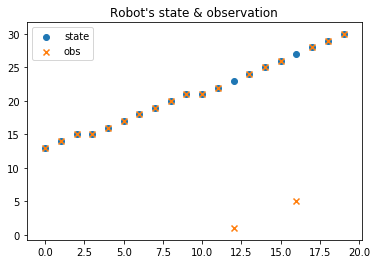

In [7]:
plot_result("Robot's state & observation", (state, "state"), (obs, "obs"))

# Question 5

## Forward-Backward Algorithm

The aim is to compute the filtering distribution iteratively, using predictive message $\alpha_{k|k-1}$ and update message $\alpha_{k|k}$

In [8]:
# Sumlog trick modified
def state_predict(A, v):
    
    vmax = np.max(v)
    return vmax + np.log(A.dot(np.exp(v - vmax)))


def forward(A, obs=obs, C=C):
    # Prediction and update message
    log_alphas_predict = np.zeros((N,K))
    log_alphas_update  = np.zeros((N,K))

    # Filtering distribution
    filt_distr = np.zeros((N,K))

    log_alphas_predict[:,0] = np.log(initial_position) # P(X1) in log-domain
    log_alphas_update[:,0] = np.log(C[obs[0], :]) + log_alphas_predict[:,0]

    for k in range(1, K):

        log_alphas_predict[:, k] = state_predict(A, log_alphas_update[:, k-1])
        log_alphas_update[:, k] = np.log(C[obs[k], :]) + log_alphas_predict[:, k]
        filt_distr[:, k] = np.exp(log_alphas_update[:, k]) / np.sum(np.exp(log_alphas_update[:, k])) #P(Xk|y1:k)

    return log_alphas_predict, log_alphas_update, filt_distr


# Get list of indexes (=location) which maximize filtering distribution
def most_likely_cur_pos(filter_dist):
    return np.argmax(filter_dist, 0) # axis = 0 because we want the argmax on the columns
    
    
    
    
    

In [9]:
log_alphas_predict, log_alphas_update, filt_distr = forward(A)

print("Filtering distribution :\n", filt_distr)

Filtering distribution :
 [[0.00000000e+000 3.51493849e-005 2.50234595e-007 ... 4.77549737e-096
  1.64893742e-097 8.28912446e-099]
 [0.00000000e+000 3.51493849e-005 2.50234595e-007 ... 9.66551130e-101
  2.37590628e-098 8.71025797e-100]
 [0.00000000e+000 3.51493849e-005 2.50234595e-007 ... 1.46078903e-097
  3.11951891e-100 1.18869426e-100]
 ...
 [0.00000000e+000 3.51493849e-005 2.50234595e-007 ... 3.11846053e-090
  5.49891945e-086 4.78930857e-084]
 [0.00000000e+000 3.51493849e-005 2.50234595e-007 ... 3.07355131e-094
  1.55154910e-092 2.73578096e-088]
 [0.00000000e+000 3.51493849e-005 2.50234595e-007 ... 3.10967727e-095
  1.59544539e-096 7.71948937e-095]]


In [10]:
cur_pos = most_likely_cur_pos(filt_distr)
print("Most likely current position :\n",cur_pos)

Most likely current position :
 [ 0 14 15 15 16 17 18 19 20 21 21 22 23 24 25 26 27 28 29 30 31 32 32 34
 35 36 37 38 38 38 38 39 40 40 41 42 42 43 44 44 44 44 45 46 47 47 47 47
 48 49  0  0  1  2  2  3  3  4  5  6  7  7  8  9  9  9 10 11 12 13 13 14
 14 15 15 16 17 18 19 20 21 21 22 23 23 23 24 25 26 26 27 28 28 29 29 30
 30 31 32 33]


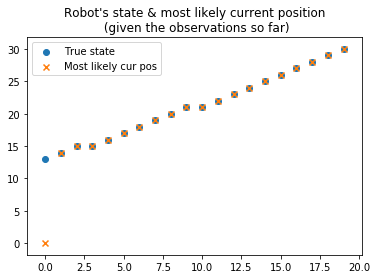

In [11]:
plot_result("Robot's state & most likely current position\n (given the observations so far)", (state, "True state"), (cur_pos, "Most likely cur pos"))


We can determine with pretty good accurracy where the robot is but the first guess is almost always wrong, this is proabbly because at this point we don't have enough observations to make a good assumption.

Text(0.5, 1.0, 'Filtering distribution')

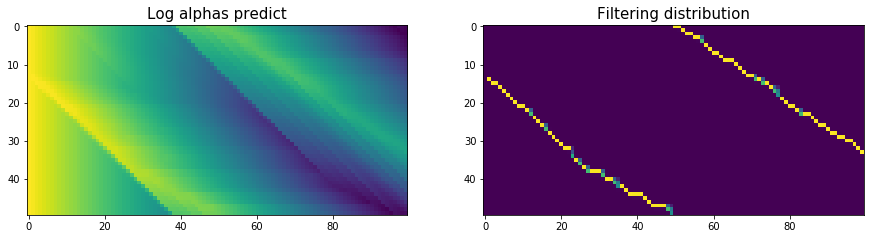

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(log_alphas_predict)
plt.title("Log alphas predict", fontsize=15)
plt.subplot(1,2,2)
plt.imshow(filt_distr)
plt.title("Filtering distribution", fontsize=15)

In [13]:
def backward(A, obs=obs, C=C):

    log_beta_predict = np.zeros((N,K))
    log_beta_update  = np.zeros((N,K))


    log_beta_predict[:, K - 1] = np.zeros(N)
    log_beta_update[:, K - 1] = log_beta_predict[:, K - 1] + np.log(C[obs[K - 1], :])

    for k in range(K-2, -1, -1 ):

        log_beta_predict[:, k ] = state_predict(A.T, log_beta_update[:, k + 1])
        log_beta_update[:, k] = np.log(C[obs[k], :]) + log_beta_predict[:, k]
        
    return log_beta_predict, log_beta_update


We can now compute the <i>Smoothing distribution</i> (b), defined as $p(x_{k} \mid y_{1:K})$, using Bayes theorem yields :

\begin{equation}
\begin{split}
p(x_{k} \mid y_{1:K}) & = \frac{p(x_{k},y_{1:K})}{p(y_{1:K})} \\
p(x_{k} \mid y_{1:K}) & = \frac{p(x_{k},y_{1:K})}{\sum_{x_k}p(x_{k},y_{1:K})}
\end{split}
\end{equation}

Computing $p(x_{k},y_{1:K})$ can therefore easily lead us to our smoothing distribution. We have:

\begin{equation}
\begin{split}
p(x_{k},y_{1:K}) & = p(x_{k},y_{1:k}, y_{k+1:K}) \\
p(x_{k},y_{1:K}) & = p(y_{k+1:K} \mid x_{k},y_{1:k}).p(x_{k},y_{1:k})
\end{split}
\end{equation}

The Hidden Markov Model for this problem tells us that $x_k$ **D-separates** $y_{k+1:K}$ from $y_{1:k}$. So by the D-separation theorem, we have that $y_{k+1:K}\perp y_{1:k} \mid x_k$, and therefore:

\begin{equation}
\begin{split}
p(x_{k},y_{1:K}) & = p(x_{k},y_{1:k}).p(y_{k+1:K} \mid x_{k}) \\
p(x_{k},y_{1:K}) & = \alpha_{k \mid k}.\beta_{k \mid k+1}
\end{split}
\end{equation}

We conclude by expressing the smoothing distribution as:

\begin{equation}
\boxed{
\begin{split}
p(x_{k} \mid y_{1:K}) & = \frac{\alpha_{k \mid k}.\beta_{k \mid k+1}}{\sum_{x_k}\alpha_{k \mid k}.\beta_{k \mid k+1}} =: \frac{\gamma_k}{\sum_{x_k}\gamma_k} 
\end{split}
}
\end{equation}

In [14]:
log_beta_predict, log_beta_update = backward(A)


log_gamma_k = log_alphas_update + log_beta_predict # P(y1:K,xk) in log-domain
gamma_k   = np.exp(log_gamma_k)

smoothing = gamma_k / np.sum(gamma_k)

cur_pos_smoothing = most_likely_cur_pos(smoothing)

In [15]:
print("Smoothing distribution :\n", smoothing)

Smoothing distribution :
 [[1.62992069e-088 2.26317312e-090 4.58206812e-099 ... 2.41231140e-102
  1.17195260e-101 8.28912446e-101]
 [1.50851152e-086 2.31875882e-088 3.23310445e-090 ... 4.88247009e-107
  1.68863263e-102 8.71025797e-102]
 [1.31021303e-084 2.14507891e-086 3.29865643e-088 ... 7.37908065e-104
  2.21714192e-104 1.18869426e-102]
 ...
 [5.82054702e-099 1.94003805e-098 6.46647684e-098 ... 1.57527003e-096
  3.90825803e-090 4.78930857e-086]
 [2.24546225e-099 6.18365322e-103 1.35719459e-102 ... 1.55258443e-100
  1.10273560e-096 2.73578096e-090]
 [1.58422118e-090 3.20753820e-099 3.01724206e-103 ... 1.57083322e-101
  1.13393410e-100 7.71948937e-097]]


Text(0.5, 1.0, 'Smoothing distribution, fontsize=15')

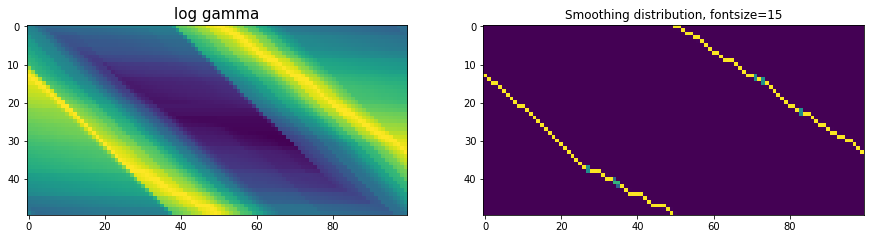

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(log_gamma_k)
plt.title("log gamma", fontsize=15)
plt.subplot(1,2,2)
plt.imshow(smoothing)
plt.title("Smoothing distribution, fontsize=15")

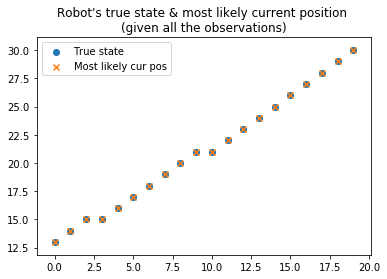

In [17]:
plot_result("Robot's true state & most likely current position \n(given all the observations)", (state, "True state"), (cur_pos_smoothing, "Most likely cur pos"))



We see that given all the observations, we no longer fail to guess the first position of the robot. This is because now we have full information of the problem set. 

# Question 6) 

Now the robot can be kidnapped, it means that he can now access every position and not only the one next to him. The transition matrix will change but the rest will remain the same.  

We can re use our code with another transition matrix which is $A^*$


$$A^* =  \begin{bmatrix} (1-\kappa)\epsilon + \frac{\kappa}{N} & \frac{\kappa}{N} & \frac{\kappa}{N} & ... & (1-\kappa)(1 - \epsilon)+ \frac{\kappa}{N} \\ (1-\kappa)(1 - \epsilon)+ \frac{\kappa}{N} & (1- \kappa)\epsilon + \frac{\kappa}{N} & \frac{\kappa}{N}  & ... & \frac{\kappa}{N} \\ ... & (1-\kappa)(1 -\epsilon) + \frac{\kappa}{N} & ... & ... & ... \\ ... & ... & ... & ... & ... \\ \frac{\kappa}{N} & \frac{\kappa}{N} & \frac{\kappa}{N} & ... & (1- \kappa)\epsilon + \frac{\kappa}{N} \end{bmatrix}$$


At a given position, to stay at the same position the robot has to get kidnapped and remain at the same location which happens with a probability of $\kappa * \frac{1}{N}$ or has to not get kidnapped and remain at the same location which happens with a probability of $ ( 1 - \kappa) * \epsilon$ 

Hence the main diagonal is given by : $(1-\kappa)\epsilon + \frac{\kappa}{N}$

To get to the very next location (counter-clock direction) from a given location, the robot has again 2 possibilities : get kidnapped and dropped at this next location which happens with a probability of $\kappa * \frac{1}{N}$ or not get kidnapped and move to the next location which happens with a probability of $ ( 1 - \kappa) * (1 - \epsilon) $

This gives us the second diagonal : $ ( 1 - \kappa) (1 - \epsilon) + \frac{\kappa}{N}$

For the robot to get to the other locations, it is only possible if he gets kidnapped and dropped there, that's why the other entries of the matrix are $\frac{\kappa}{N}$


*Unlike the previous problem which was very regular (the robot could only move to the next location or stay where it was), this new problem is more uncertain since the robot can now access every location with a certain (tiny) probability. More over, once kidnapped, the robot's new location is completely independent from the previous one. We expect that the current positions infered by the filtering distribution will not be very precise while the current positions infered by the smoothing distribution will be way better.*  


In [18]:
kappa = 0.1

# To check if our matrix is correctly initialized
print("main diag", eps * (1 - kappa) + kappa / N )
print("secondary diag", (1 - eps) * (1 - kappa) + kappa / N )
print("others entry", kappa / N,"\n") 
 
# Main diag + secondary diag
A2 = np.eye(N) *  (eps * (1 - kappa) + kappa / N ) + np.diag(np.ones(N - 1) * ((1 - eps) * (1 - kappa) + kappa / N) , k = -1)

# Fill the entries = 0 by K/N
A2[A2 == 0] = kappa / N

# We don't forget the last entry of the first line
A2[0, :][-1] = (1 - eps) * (1 - kappa) + kappa / N

print("Transition matrix :\n", A2)


print("\n Check sum for line / col : ", np.sum(A2[0, :]), np.sum(A2[:, 0]))

main diag 0.272
secondary diag 0.632
others entry 0.002 

Transition matrix :
 [[0.272 0.002 0.002 ... 0.002 0.002 0.632]
 [0.632 0.272 0.002 ... 0.002 0.002 0.002]
 [0.002 0.632 0.272 ... 0.002 0.002 0.002]
 ...
 [0.002 0.002 0.002 ... 0.272 0.002 0.002]
 [0.002 0.002 0.002 ... 0.632 0.272 0.002]
 [0.002 0.002 0.002 ... 0.002 0.632 0.272]]

 Check sum for line / col :  1.0 1.0


In [19]:
state2, obs2 = data_generation(A2)

Robot states
 [33 45 46 47 47 48 49  6  7  8  9 10 11 11 11 12 13 14 15 16 17 18 19 19
 20 20 20 20 21 22 23  8  9  9 10 10 11 11 11 12 13 14 15 16 16 17 18 19
 20 41 42 43 43 44 22 23 24 24 24 13 14 15 15 16 17 45 46 47 42 43 43 48
 49  0  1  2  3  4  4  5  6  7  8  8  9 10 11 12 13 13 14 15 15 16 17 17
 17 18 19 19]

Sensors observation
 [29 45 46 47 43 48 49 30  7  8  9 10 11 11 11 12 13 17 21 47 32 18 42 19
 20 20 15 20 32 22 41  8 32 18 10 10 11 33 11 40 13 14 15 16 16 17 18 19
 20 41 42 33 14 39 22 23 24 14 21 13 14 28 31 16 17 45 46 47 42 43 43 48
 49 29  1  2  3  4  4 21 47  7  8  8  9 10 34 12 27 13 14 15 15 16 17 17
 17 18 19 19]


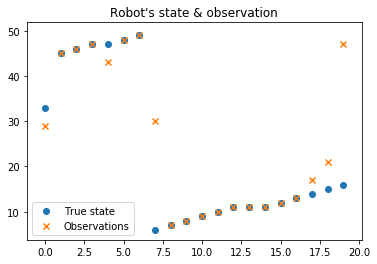

In [20]:
plot_result("Robot's state & observation", (state2, "True state"), (obs2, "Observations"))

In [21]:
# Recalculate every quantities with the new transition matrix

log_alphas_predict2, log_alphas_update2, filt_distr2 = forward(A2, obs2)

log_beta_predict2, log_beta_update2 = backward(A2, obs2)

log_gamma2 = log_alphas_update2 + log_beta_predict2 

gamma2 = np.exp(log_gamma2)

smoothing2 = gamma2 / np.sum(gamma2)


In [22]:
print("New filtering distribution :\n",filt_distr2)

New filtering distribution :
 [[0.00000000e+00 2.64150943e-03 6.39576556e-05 ... 1.60958194e-05
  1.58581487e-05 3.62846236e-05]
 [0.00000000e+00 2.64150943e-03 6.39576556e-05 ... 1.60958194e-05
  1.58581487e-05 3.62846236e-05]
 [0.00000000e+00 2.64150943e-03 6.39576556e-05 ... 1.60958194e-05
  1.58581487e-05 3.62846236e-05]
 ...
 [0.00000000e+00 2.64150943e-03 6.39576556e-05 ... 1.60958194e-05
  1.58581487e-05 3.62846236e-05]
 [0.00000000e+00 2.64150943e-03 6.39576556e-05 ... 1.60958194e-05
  1.58581487e-05 3.62846236e-05]
 [0.00000000e+00 2.64150943e-03 6.39576556e-05 ... 1.60958194e-05
  1.58581487e-05 3.62846236e-05]]


Text(0.5, 1.0, 'Filtering distribution')

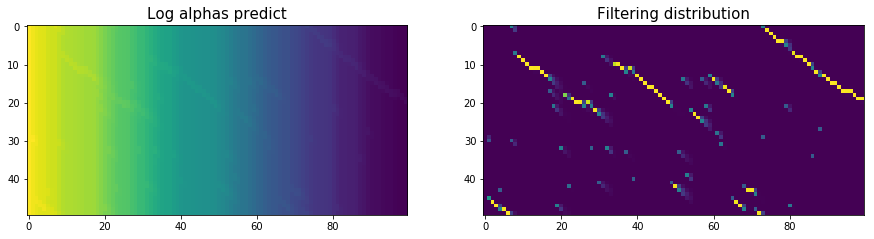

In [23]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.imshow(log_alphas_predict2)
plt.title("Log alphas predict",fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(filt_distr2)
plt.title("Filtering distribution", fontsize = 15)

In [24]:
cur_pos2 = most_likely_cur_pos(filt_distr2)

print("Most likely current positions (given obs so far) :\n", cur_pos2)

Most likely current positions (given obs so far) :
 [ 0 45 46 47 48 48 49  0  7  8  9 10 11 11 11 12 13 14 21 47 32 18 42 19
 20 20 21 20 21 22 23  8 32 18 10 10 11 12 11 12 13 14 15 16 16 17 18 19
 20 21 42 43 14 39 22 23 24 25 21 13 14 15 31 16 17 18 46 47 48 43 43 44
 49  0  1  2  3  4  4  5 47  7  8  8  9 10 11 12 13 13 14 15 15 16 17 17
 17 18 19 19]


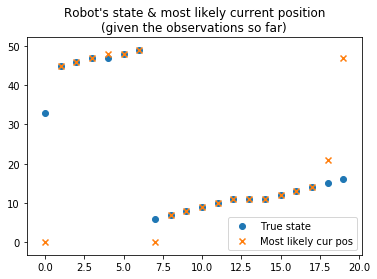

In [25]:

plot_result("Robot's state & most likely current position\n(given the observations so far)", (state2, "True state"), (cur_pos2, "Most likely cur pos"))


As expected, it's not very precise. It's less precise than the current position estimated without the random kidnapping.

In [26]:
print("New smoothing distribution :\n", smoothing2)

New smoothing distribution :
 [[1.43584015e-05 1.58289689e-07 2.13314996e-09 ... 5.45967612e-10
  3.99930895e-09 3.62846236e-07]
 [1.43584038e-05 1.58295549e-07 2.14084971e-09 ... 5.45967612e-10
  3.99930895e-09 3.62846236e-07]
 [1.43584028e-05 1.58298071e-07 2.15296575e-09 ... 5.45967612e-10
  3.99930895e-09 3.62846236e-07]
 ...
 [1.43671081e-05 2.03343760e-07 2.77990053e-07 ... 5.45967612e-10
  3.99930895e-09 3.62846236e-07]
 [1.43584063e-05 1.58334713e-07 2.42603842e-09 ... 5.45967612e-10
  3.99930895e-09 3.62846236e-07]
 [1.43583983e-05 1.58286860e-07 2.13375628e-09 ... 5.45967612e-10
  3.99930895e-09 3.62846236e-07]]


In [27]:
cur_pos_smoothing2 = most_likely_cur_pos(smoothing2)

print("Most likely current positions (given all obs) :\n", cur_pos_smoothing2)

Most likely current positions (given all obs) :
 [44 45 46 47 48 48 49  6  7  8  9 10 11 11 11 12 13 14 15 16 17 18 18 19
 20 20 20 20 21 22 23  8  9  9 10 10 11 11 11 12 13 14 15 16 16 17 18 19
 20 41 42 43 14 21 22 23 24 25 12 13 14 15 15 16 17 45 46 47 42 43 43 48
 49  0  1  2  3  4  4  5  6  7  8  8  9 10 11 12 12 13 14 15 15 16 17 17
 17 18 19 19]


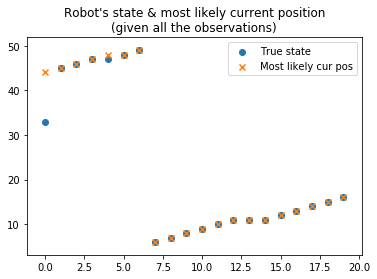

In [28]:
plot_result("Robot's state & most likely current position\n(given all the observations)", (state2, "True state"), (cur_pos_smoothing2, "Most likely cur pos"))


Text(0.5, 1.0, 'Smoothing distribution')

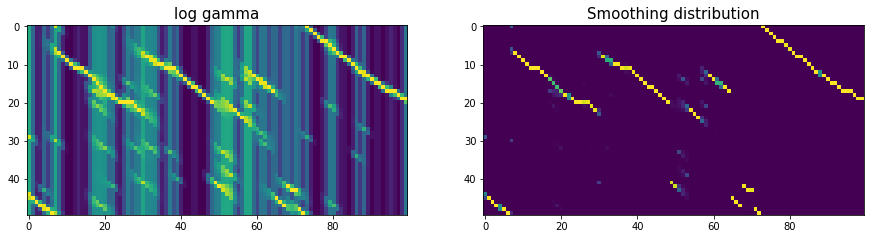

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(log_gamma2)
plt.title("log gamma",fontsize=15)
plt.subplot(1,2,2)
plt.imshow(smoothing2)
plt.title("Smoothing distribution",fontsize=15)

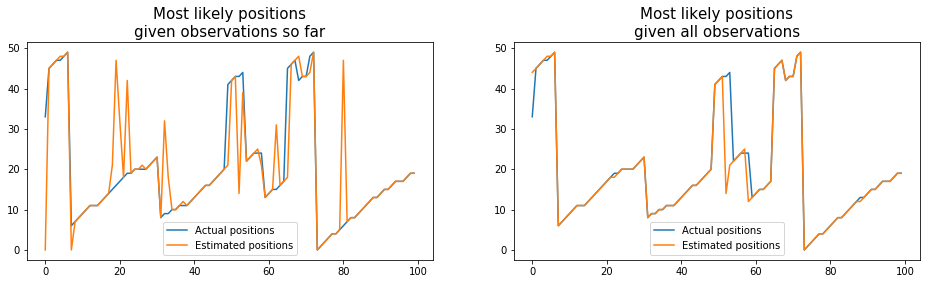

In [30]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(range(K), state2, label="Actual positions")
plt.plot(range(K), cur_pos2, label="Estimated positions")
plt.title("Most likely positions\ngiven observations so far", fontsize=15)
plt.legend()
plt.subplot(122)
plt.plot(range(K), state2, label="Actual positions")
plt.plot(range(K), cur_pos_smoothing2, label="Estimated positions")
plt.title("Most likely positions\ngiven all observations", fontsize=15)
plt.legend()

# Conclusion

From these numerical experiments, we can see that the predictions using the filtering distribution is quite sensitive to random noise (the kidnapping with a low probability of $\kappa = 0.1$ ) while the predictions using the smoothing distribution is way better because it uses all the observations and is therefore less sensitive to outliers and can gives better insight of the true latent variables. 